**CENNI TEORICI**
In una rete non orientata, il grado di un nodo è il numero
di archi ad esso collegati.

La centralità dell'auto-vettore è un'estensione della centralità del grado che
tiene conto di questo fattore. Invece di assegnare solo un punto per ogni vicino
di rete di un nodo, la centralità degli auto-vettori assegna un numero di punti
proporzionale ai punteggi di centralità dei vicini.

ES. potresti avere un solo amico al mondo, ma se quell'amico è il
presidente degli Stati Uniti, allora tu stesso potresti essere una persona
importante. Quindi la centralità non riguarda solo quante persone conosci, ma
anche chi conosci.

In [1]:
import networkx as nx
import numpy as np
import os
import csv
import pandas as pd

# Carica il dataset da CSV
data = pd.read_csv('/cleanDataset.csv')

#Carica i pesi dei sintomi da CSV
symptom_weights = pd.read_csv('/Symptom-severity.csv')
symptom_weights = dict(zip(symptom_weights['Symptom'], symptom_weights['weight']))

# Crea un grafo non diretto
G = nx.Graph()

data = data.fillna("Unknown")

for index, row in data.iterrows():
    disease = row['Disease']
    symptoms = list(row[1:])  # Tutti i sintomi eccetto il primo che è il nome della malattia
    G.add_node(disease)
    for symptom in symptoms:
      if not symptom == 'Unknown':
        G.add_edge(disease, symptom)

FileNotFoundError: [Errno 2] No such file or directory: '/cleanDataset.csv'

codice per EDITING DI PLOT

**nx.kamada_kawai_layout(G)** Utilizza un algoritmo di ottimizzazione per posizionare i nodi in modo che la lunghezza dei collegamenti sia minimizzata e la struttura del grafo sia preservata.

**nx.spring_layout(G)** calcola le posizioni dei nodi nel grafico G in base all'algoritmo di disposizione a molla.
Questo algoritmo tende a posizionare i nodi in modo che le forze tra i nodi siano bilanciate, simulando un sistema di molle che si allungano e si contraggono fino a raggiungere un equilibrio.

In [ ]:
import matplotlib.pyplot as plt

# Disposizione dei nodi
pos = nx.spring_layout(G)
nodes = G.nodes()

# Crea un elenco di colori per i nodi
node_colors = []
for node in nodes:
    if node in data['Disease'].values:
        node_colors.append('blue')  # Malattie in blu
    else:
        node_colors.append('red')   # Sintomi in rosso

misurazione, stampa e plot della degree_centrality

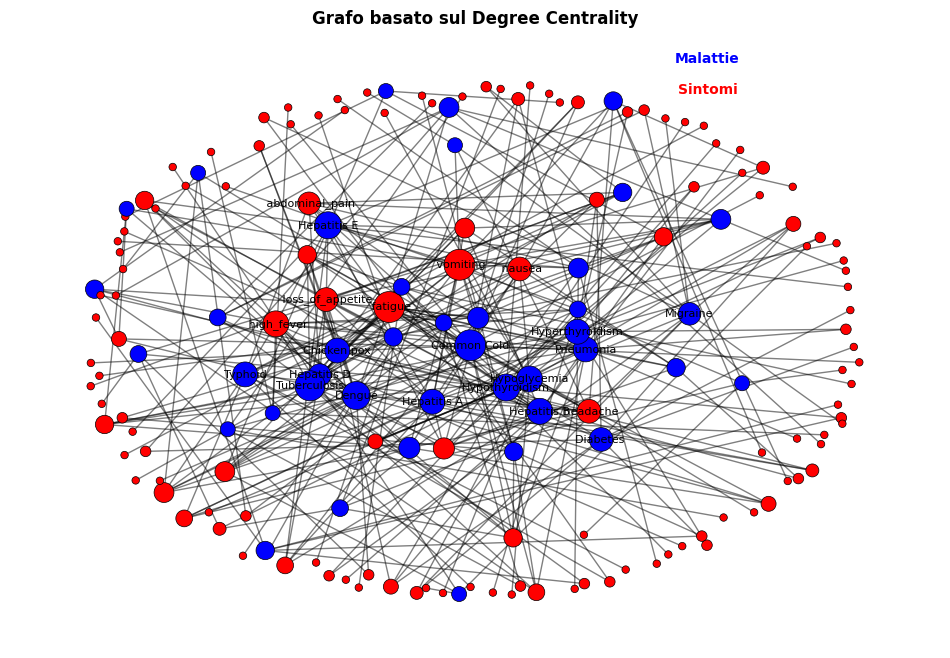

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Calcola il Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calcola la posizione dei nodi usando il layout spring, regolando la forza di attrazione/repulsione tra i nodi
pos = nx.spring_layout(G, seed=42, iterations=100, k=2)  # Regola il valore di k come desiderato

# Crea un grafico vuoto per il Degree Centrality
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in degree_centrality.values()], node_color=node_colors, edgecolors='black', linewidths=0.5)

# Ciclo per aggiungere etichette solo per nodi con centralità maggiore di un certo valore
for node, centrality in degree_centrality.items():
    if centrality > threshold:
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=8, font_color='black', font_family='sans-serif')

nx.draw_networkx_edges(G, pos, alpha=0.5)

# Aggiungi una legenda
plt.text(0.75, 0.95, "Malattie", color='blue', transform=plt.gca().transAxes, ha='center', fontweight='bold')
plt.text(0.75, 0.90, "Sintomi", color='red', transform=plt.gca().transAxes, ha='center', fontweight='bold')

plt.title('Grafo basato sul Degree Centrality', fontweight='bold')
plt.axis('off')
plt.show()


misurazione, stampa e plot della eigenvector_centrality


Eigenvector Centrality:


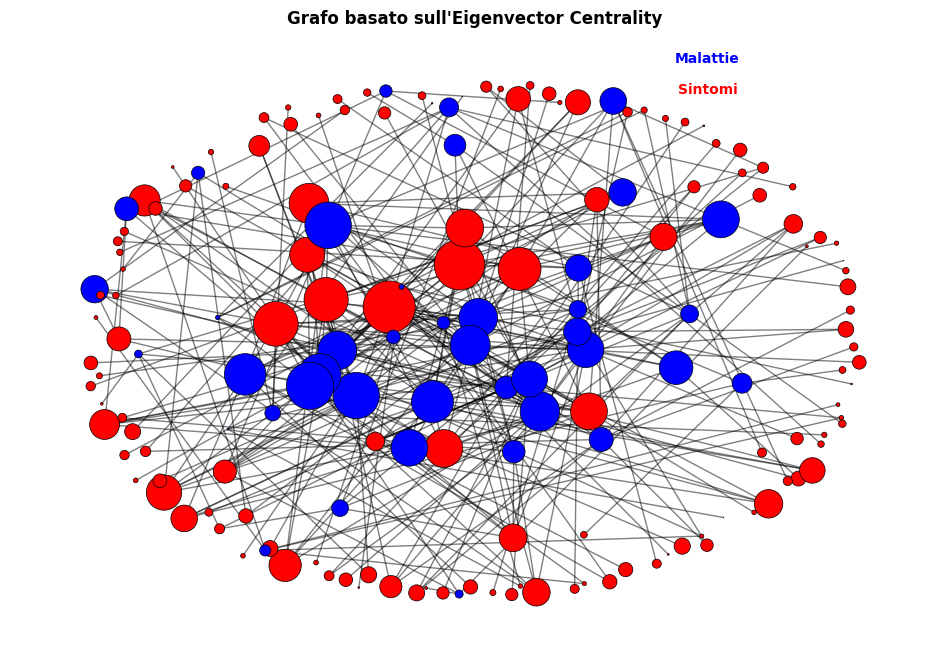

In [ ]:
# Calcola l'Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Stampare i risultati della centralità degli autovettori
print("\nEigenvector Centrality:")
#for node, centrality in eigenvector_centrality.items():
#    print(f"{node}: {centrality}")

# Crea un grafico vuoto per Eigenvector Centrality
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in eigenvector_centrality.values()], node_color=node_colors, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
#nx.draw_networkx_labels(G, pos, font_size=5, font_color='black', font_family='sans-serif')

# Aggiungi una legenda
plt.text(0.75, 0.95, "Malattie", color='blue', transform=plt.gca().transAxes, ha='center', fontweight='bold')
plt.text(0.75, 0.90, "Sintomi", color='red', transform=plt.gca().transAxes, ha='center', fontweight='bold')

plt.title('Grafo basato sull\'Eigenvector Centrality', fontweight='bold')
plt.axis('off')
plt.show()

misurazione, stampa e plot della Page Rank


Katz Centrality (PageRank):


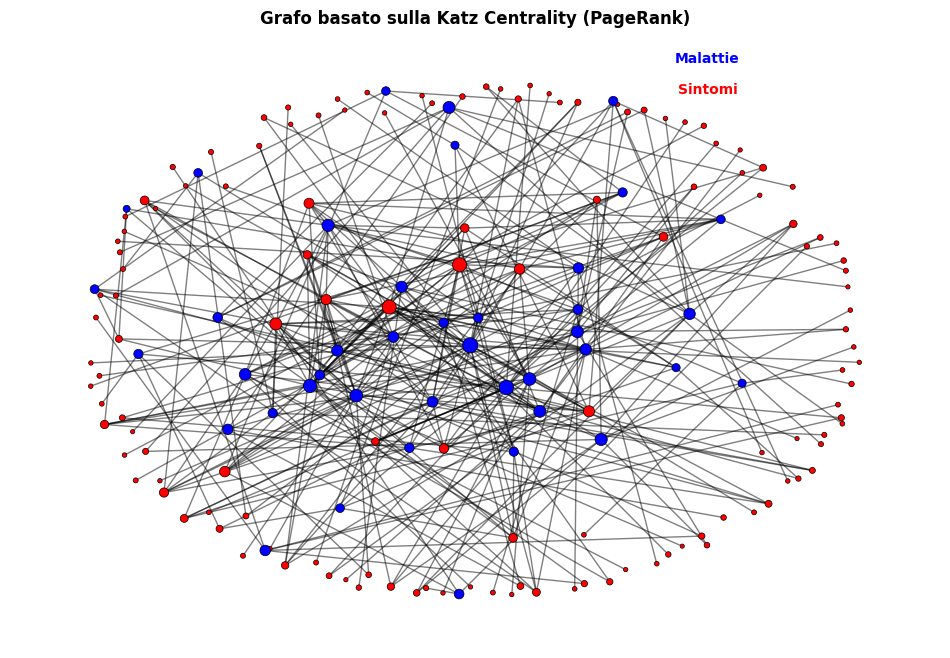

In [ ]:
# Calcola la Katz Centrality (PageRank)
katz_centrality = nx.pagerank(G)

# Stampare i risultati della centralità di katz
print("\nKatz Centrality (PageRank):")
#for node, centrality in katz_centrality.items():
#    print(f"{node}: {centrality}")

# Crea un grafico vuoto per Katz Centrality
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in katz_centrality.values()], node_color=node_colors, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
#nx.draw_networkx_labels(G, pos, font_size=5, font_color='black', font_family='sans-serif')

# Aggiungi una legenda
plt.text(0.75, 0.95, "Malattie", color='blue', transform=plt.gca().transAxes, ha='center', fontweight='bold')
plt.text(0.75, 0.90, "Sintomi", color='red', transform=plt.gca().transAxes, ha='center', fontweight='bold')

plt.title('Grafo basato sulla Katz Centrality (PageRank)', fontweight='bold')
plt.axis('off')
plt.show()

misurazione, stampa e plot della HITS


HITS Centrality (Authority Scores):


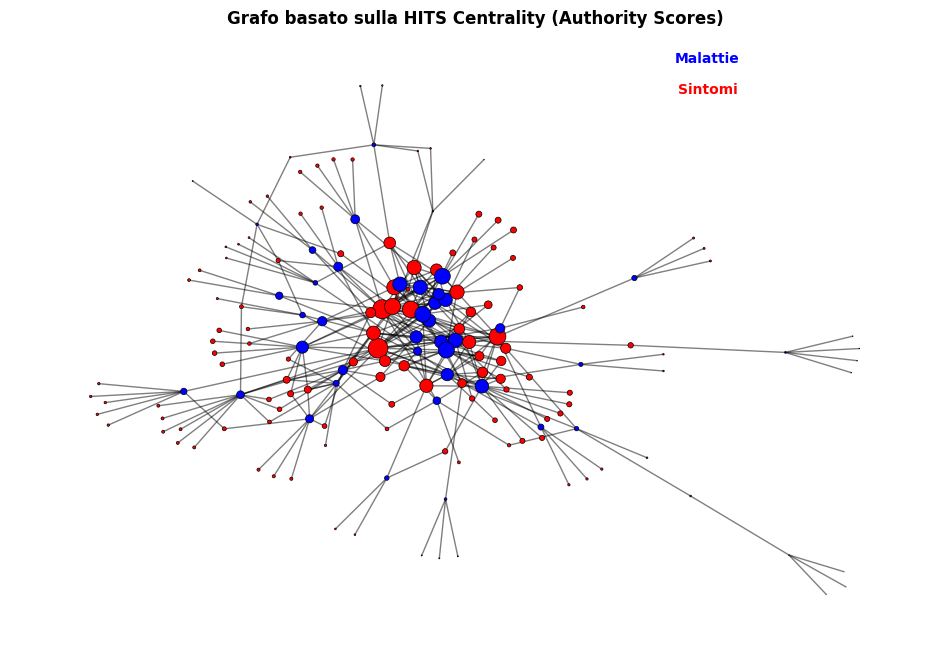

In [ ]:
# Calcola la HITS Centrality
hits_scores = nx.hits(G)
authority_scores = hits_scores[1]  # Estrai i punteggi di autorità

# Stampare i risultati della HITS centrality
print("\nHITS Centrality (Authority Scores):")
#for node, score in authority_scores.items():
#    print(f"{node}: {score}")

# Crea un grafico vuoto per la HITS Centrality
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in authority_scores.values()], node_color=node_colors, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
#nx.draw_networkx_labels(G, pos, font_size=5, font_color='black', font_family='sans-serif')

# Aggiungi una legenda
plt.text(0.75, 0.95, "Malattie", color='blue', transform=plt.gca().transAxes, ha='center', fontweight='bold')
plt.text(0.75, 0.90, "Sintomi", color='red', transform=plt.gca().transAxes, ha='center', fontweight='bold')

plt.title('Grafo basato sulla HITS Centrality (Authority Scores)', fontweight='bold')
plt.axis('off')
plt.show()

misurazione, stampa e plot della beetweeness_centrality


beetweeness_centrality Centrality (Authority Scores):


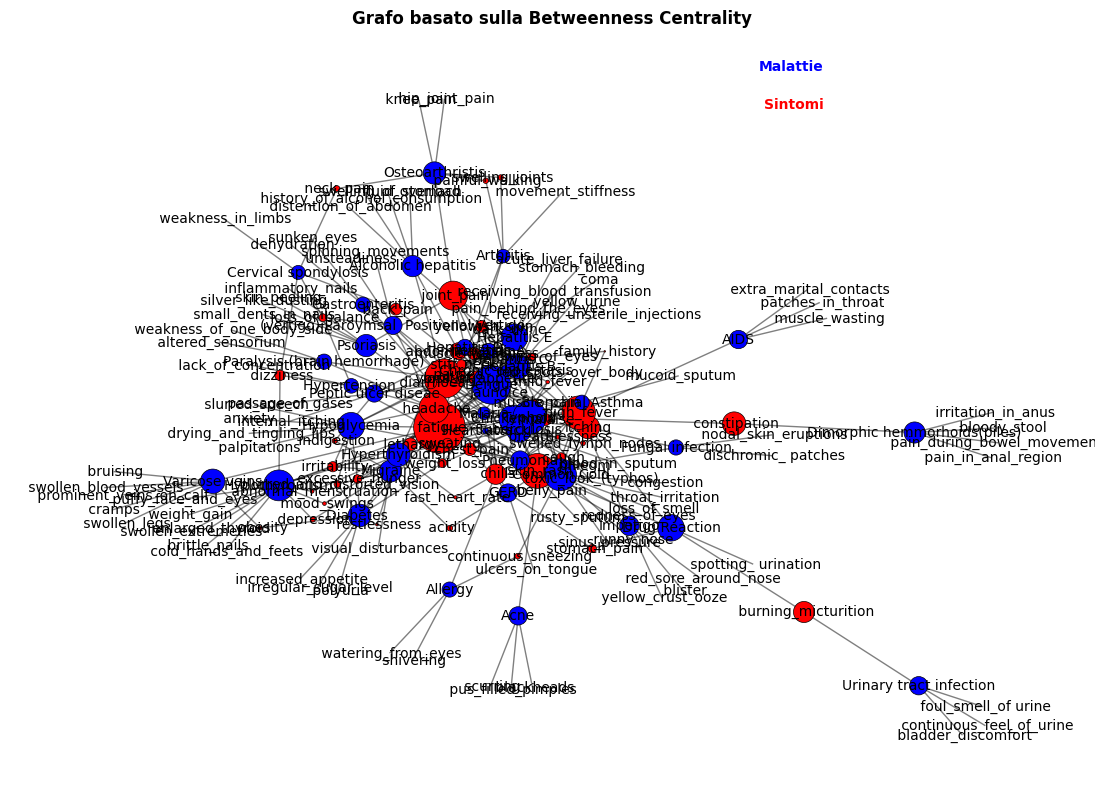

In [ ]:
# Calcola la Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Stampare i risultati della beetweeness_centrality
print("\nbeetweeness_centrality Centrality (Authority Scores):")
#for node, score in betweenness_centrality.items():
#    print(f"{node}: {score}")

# Crea un grafico vuoto per la Betweenness Centrality
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in betweenness_centrality.values()], node_color=node_colors, edgecolors='black', linewidths=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family='sans-serif')

# Aggiungi una legenda
plt.text(0.75, 0.95, "Malattie", color='blue', transform=plt.gca().transAxes, ha='right', fontweight='bold')
plt.text(0.75, 0.90, "Sintomi", color='red', transform=plt.gca().transAxes, ha='right', fontweight='bold')

plt.title('Grafo basato sulla Betweenness Centrality', fontweight='bold')
plt.axis('off')
plt.show()

misurazione, stampa e plot della closeness_centrality, **questa misurazione non ha senso essere fatta**

In [ ]:
# Calcola la Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Stampare i risultati della closeness centrality
print("\nCloseness Centrality:")
#for node, score in closeness_centrality.items():
#    print(f"{node}: {score}")

# Crea un grafico vuoto per la Closeness Centrality, NON HA SENSO STAMPARE IL GRAFO DELLA CLOSSENESS CENTRALITY PERCHé
# INDICA LA VICINANZNA AD UN NODO, QUINDI LA SOMIGLIANZA. QUESTA MISURAZIONE NON HA SENSO
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in closeness_centrality.values()], node_color=node_colors,  edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
#nx.draw_networkx_labels(G, pos, font_size=5, font_color='black', font_family='sans-serif')

# Aggiungi una legenda
plt.text(0.75, 0.95, "Malattie", color='blue', transform=plt.gca().transAxes, ha='center', fontweight='bold')
plt.text(0.75, 0.90, "Sintomi", color='red', transform=plt.gca().transAxes, ha='center', fontweight='bold')

plt.title('Grafo basato sulla Closeness Centrality', fontweight='bold')
plt.axis('off')
plt.show()

funzione che calcola la media della pericolosità di una malattia partendo dalla pericolosità dei sintomi che compongono nella malattia stessa.


In [ ]:
def calculate_disease_severity(disease_name, symptom_weights):
    # Verifica se la malattia è presente nel dataset
    if disease_name not in data['Disease'].values:
        print(f"La malattia '{disease_name}' non è presente nel dataset delle malattie.")
        return None

    # Seleziona i sintomi associati alla malattia
    disease_symptoms = data.loc[data['Disease'] == disease_name].iloc[:, 1:].values.flatten()

    # Verifica se ci sono sintomi associati alla malattia
    if len(disease_symptoms) == 0:
        print(f"La malattia '{disease_name}' non ha sintomi associati nel dataset.")
        return None

    relevant_symptom_weights=[]
    for symptom1 in disease_symptoms:
      fixed = symptom1[1:]
      weight=symptom_weights.get(fixed)
      if not weight == None:
        relevant_symptom_weights.append(weight)
    # Calcola la pericolosità media della malattia
    #relevant_symptom_weights = [symptom_weights[symptom] for symptom in disease_symptoms if symptom in symptom_weights]
    print(relevant_symptom_weights)
    if relevant_symptom_weights:
        disease_severity = np.mean(relevant_symptom_weights)
        return disease_severity
    else:
        print(f"I sintomi associati alla malattia '{disease_name}' non hanno pesi corrispondenti nel dataset dei pesi dei sintomi.")
        return None

# Esempio di utilizzo
disease_name = "Heart attack"
disease_severity = calculate_disease_severity(disease_name, symptom_weights)
if disease_severity is not None:
    print(f"La pericolosità media della malattia {disease_name} è: {disease_severity}")
else:
    print(f"Il sintomo o la malattia '{disease_name}' non è presente nel dataset dei pesi dei sintomi.")


[5, 4, 3, 7]
La pericolosità media della malattia Heart attack è: 4.75


In [ ]:
# Trova la malattia con la media più alta nel dataset
max_avg_severity = float('-inf')
most_severe_disease = None

for disease_name in data['Disease']:
    disease_severity = calculate_disease_severity(disease_name, symptom_weights)
    if disease_severity is not None and disease_severity > max_avg_severity:
        max_avg_severity = disease_severity
        most_severe_disease = disease_name

if most_severe_disease is not None:
    print(f"La malattia con la media più alta nel dataset è: {most_severe_disease} con una pericolosità media dei sintomi di {max_avg_severity}")
else:
    print("Nessuna malattia nel dataset ha sintomi associati con pesi corrispondenti nel dataset dei pesi dei sintomi.")

obbiettivo dello studio: ogni sintomo ha un grado di pericolosità, (da prendere sull'altro dataset) da 1 a 7.. capire quale malattia associata al sintomo con pericolosità x è più pericolosa.

todo: inizare a scrivere la relazione

todo: estetica dei grafi

todo: capire bene i risultati

todo: correlazione tra sintomi e malattie

todo: cercare altri dataset e nel caso mergiarli

todo: mappa del mondo malattie

todo: validazione del dataset